In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sbs
import matplotlib.ticker as mtick

In [18]:
# Script parameters
input_csv = "../results-yasmin/parsec-phoenix.csv"
# input_csv = "../results-yasmin/parsec-simsmall.csv"
baseline = "x86_64,qemu,qemu"

In [19]:
# Parsing baseline argument
base_arch, base_runtime, base_tag = baseline.split(',')

In [20]:
# Read input file
df = pd.read_csv(input_csv, sep=';')
df

,arch,bench,cmdline,dataset,retval,threads,unit,value,runtime,tag
0,aarch64,parsec.blackscholes,/home/redha/benchmarks/parsec-benchmark-shared...,native,0.0,112.0,seconds,40.844292,native,native
1,aarch64,parsec.blackscholes,/home/redha/benchmarks/parsec-benchmark-shared...,native,0.0,112.0,seconds,40.442793,native,native
2,aarch64,parsec.blackscholes,/home/redha/benchmarks/parsec-benchmark-shared...,native,0.0,112.0,seconds,40.683197,native,native
3,aarch64,parsec.blackscholes,/home/redha/benchmarks/parsec-benchmark-shared...,native,0.0,112.0,seconds,40.693010,native,native
4,aarch64,parsec.blackscholes,/home/redha/benchmarks/parsec-benchmark-shared...,native,0.0,112.0,seconds,40.697398,native,native
...,...,...,...,...,...,...,...,...,...,...
675,x86_64,parsec.freqmine,/home/redha/benchmarks/parsec-benchmark-x86_64...,native,0.0,112.0,seconds,821.048462,qemu,risotto
676,x86_64,parsec.freqmine,/home/redha/benchmarks/parsec-benchmark-x86_64...,native,0.0,112.0,seconds,800.556283,qemu,risotto
677,x86_64,parsec.freqmine,/home/redha/benchmarks/parsec-benchmark-x86_64...,native,0.0,112.0,seconds,812.320119,qemu,risotto
678,x86_64,parsec.freqmine,/home/redha/benchmarks/parsec-benchmark-x86_64...,native,0.0,112.0,seconds,821.895151,qemu,risotto


In [21]:
# Extract baseline from dataframe
base_df = df.loc[(df['arch'] == base_arch) & (df['runtime'] == base_runtime) & (df['tag'] == base_tag)]
base_df

,arch,bench,cmdline,dataset,retval,threads,unit,value,runtime,tag
90,x86_64,parsec.blackscholes,/home/redha/benchmarks/parsec-benchmark-x86_64...,native,0.0,112.0,seconds,647.683321,qemu,qemu
91,x86_64,parsec.blackscholes,/home/redha/benchmarks/parsec-benchmark-x86_64...,native,0.0,112.0,seconds,648.183092,qemu,qemu
92,x86_64,parsec.blackscholes,/home/redha/benchmarks/parsec-benchmark-x86_64...,native,0.0,112.0,seconds,648.032295,qemu,qemu
93,x86_64,parsec.blackscholes,/home/redha/benchmarks/parsec-benchmark-x86_64...,native,0.0,112.0,seconds,647.730578,qemu,qemu
94,x86_64,parsec.blackscholes,/home/redha/benchmarks/parsec-benchmark-x86_64...,native,0.0,112.0,seconds,648.517034,qemu,qemu
...,...,...,...,...,...,...,...,...,...,...
665,x86_64,parsec.canneal,/home/redha/benchmarks/parsec-benchmark-x86_64...,native,0.0,112.0,seconds,589.842423,qemu,qemu
666,x86_64,parsec.canneal,/home/redha/benchmarks/parsec-benchmark-x86_64...,native,0.0,112.0,seconds,591.330858,qemu,qemu
667,x86_64,parsec.canneal,/home/redha/benchmarks/parsec-benchmark-x86_64...,native,0.0,112.0,seconds,588.056925,qemu,qemu
668,x86_64,parsec.canneal,/home/redha/benchmarks/parsec-benchmark-x86_64...,native,0.0,112.0,seconds,587.381071,qemu,qemu


In [22]:
# Get the mean for each baseline benchmark
base_means = {}
for b in set(base_df['bench']):
    base_means[b] = np.array(base_df.loc[base_df['bench'] == b]['value'].values, dtype=np.float32).mean()

In [23]:
# Print the mean of every benchmark for each runtime
mean_df = pd.DataFrame()
for b in sorted(set(df['bench'])):
    df_b = df.loc[df['bench'] == b]
    tmp_dict = { 'bench': b }
    for t in set(df_b['tag']):
        df_b_t = df_b.loc[df_b['tag'] == t]
        tmp_dict[t] = np.mean(df_b_t['value'])
    mean_df = mean_df.append(tmp_dict, ignore_index=True)
mean_df

/tmp/ipykernel_47008/2931865525.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mean_df = mean_df.append(tmp_dict, ignore_index=True)
/tmp/ipykernel_47008/2931865525.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mean_df = mean_df.append(tmp_dict, ignore_index=True)
/tmp/ipykernel_47008/2931865525.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mean_df = mean_df.append(tmp_dict, ignore_index=True)
/tmp/ipykernel_47008/2931865525.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mean_df = mean_df.append(tmp_dict, ignore_index=True)
/tmp/ipykernel_47008/2931865525.py:9: FutureWarning: The frame.append method is deprecated a

,bench,risotto,tcg-tso,no-fences,native,qemu
0,parsec.blackscholes,661.469304,645.103894,440.072515,40.571463,648.700926
1,parsec.bodytrack,1845.791431,1842.039956,671.116212,59.574084,2129.331838
2,parsec.canneal,573.722532,581.910585,495.857047,73.631671,569.590798
3,parsec.facesim,5839.043942,5858.542277,2393.828023,186.680181,6090.602651
4,parsec.fluidanimate,1874.010316,1883.344459,815.944802,105.191636,1872.583696
5,parsec.freqmine,812.083879,830.545108,229.315205,44.459187,931.099171
6,parsec.streamcluster,1710.196432,1712.160418,686.885316,101.968958,1820.856527
7,parsec.swaptions,648.113198,608.450446,266.977055,24.582150,672.645884
8,parsec.vips,236.216244,233.109855,88.545843,11.794361,277.948641
9,phoenix.histogram,2.302949,2.399004,1.362286,0.718899,2.827272


In [24]:
# Normalize all results from original df to these means
df_norm = pd.DataFrame(columns=['arch', 'bench', 'dataset', 'threads', 'unit', 'value', 'runtime',
                                'tag', 'norm', 'label'])
norm_vals = []
for row in df.itertuples():
    try:
        if row.arch == base_arch and row.runtime == base_runtime and row.tag == base_tag:
            continue
        # norm = base_means[row.bench] / float(row.value)      # speedup
        norm = 100 * float(row.value) / base_means[row.bench]    # relative perf
        
        # norm = 100 * (base_means[row.bench] - float(row.value)) / base_means[row.bench]
        dct = row._asdict()
        dct['norm'] = norm
        dct['label'] = f"{dct['tag']}"
        # dct['label'] = f"{dct['runtime']}-{dct['tag']}"
        del dct['Index']
        del dct['cmdline']
        norm_vals.append(dct)
    except KeyError:
        pass
df_norm = df_norm.append(norm_vals, ignore_index=True)
df_norm

/tmp/ipykernel_47008/1778803598.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_norm = df_norm.append(norm_vals, ignore_index=True)


,arch,bench,dataset,threads,unit,value,runtime,tag,norm,label,retval
0,aarch64,parsec.blackscholes,native,112.0,seconds,40.844292,native,native,6.296321,native,0.0
1,aarch64,parsec.blackscholes,native,112.0,seconds,40.442793,native,native,6.234428,native,0.0
2,aarch64,parsec.blackscholes,native,112.0,seconds,40.683197,native,native,6.271487,native,0.0
3,aarch64,parsec.blackscholes,native,112.0,seconds,40.69301,native,native,6.273,native,0.0
4,aarch64,parsec.blackscholes,native,112.0,seconds,40.697398,native,native,6.273677,native,0.0
...,...,...,...,...,...,...,...,...,...,...,...
515,x86_64,parsec.freqmine,native,112.0,seconds,821.048462,qemu,risotto,88.180553,risotto,0.0
516,x86_64,parsec.freqmine,native,112.0,seconds,800.556283,qemu,risotto,85.979694,risotto,0.0
517,x86_64,parsec.freqmine,native,112.0,seconds,812.320119,qemu,risotto,87.24313,risotto,0.0
518,x86_64,parsec.freqmine,native,112.0,seconds,821.895151,qemu,risotto,88.271487,risotto,0.0


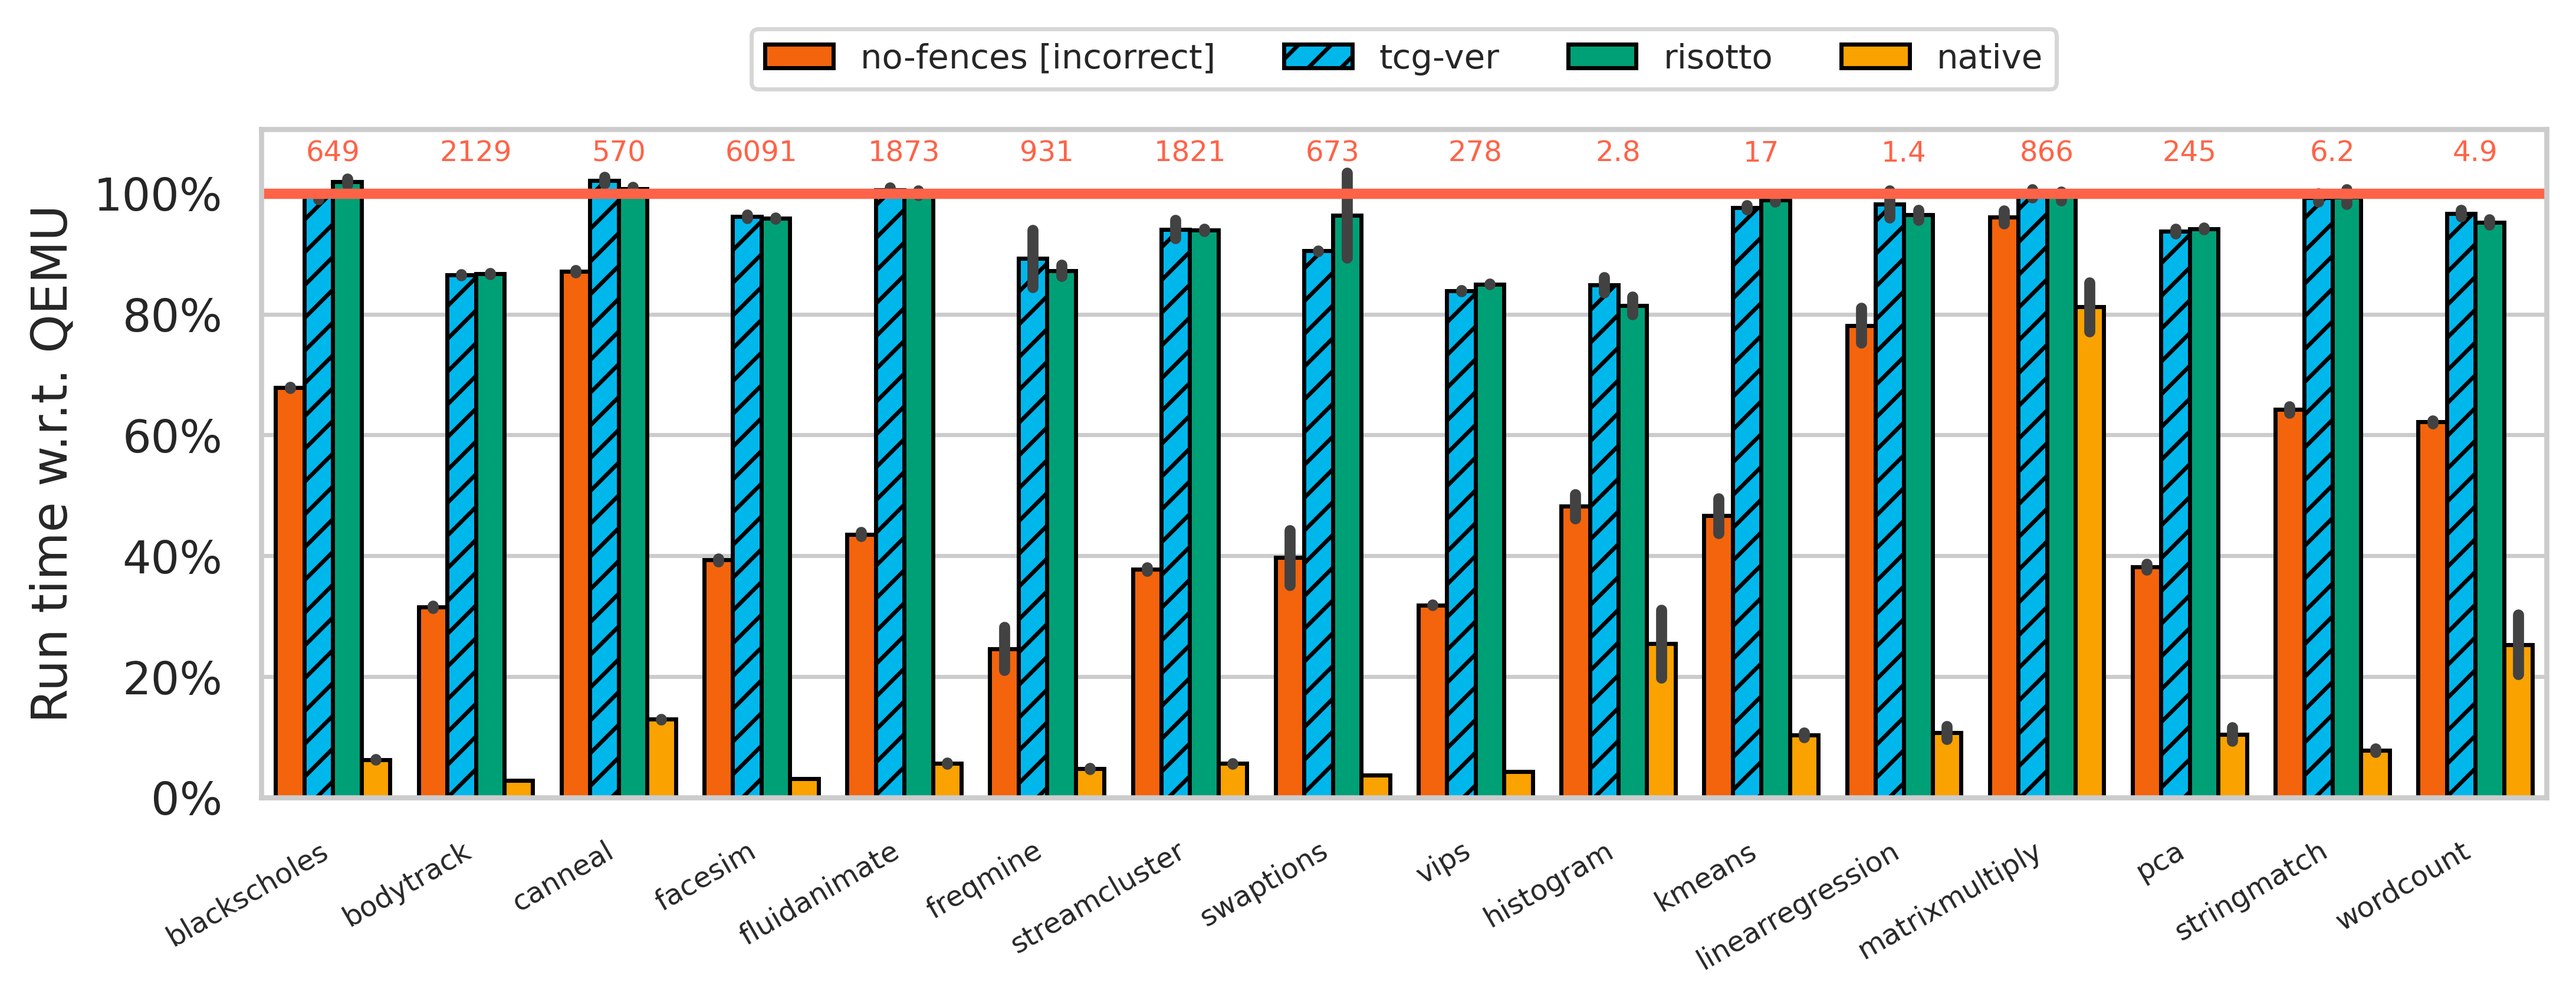

In [25]:
# refactor xticks to remove benchmark suite prefix
xlabels = []
xticks = []
for idx, b in enumerate(sorted(set(df_norm['bench']))):
    if b.startswith("parsec."):
        xlabels.append(b[7:])
        xticks.append(idx)
    else:
        xlabels.append(b[8:])
        xticks.append(idx)

# Plot
fig = plt.figure(figsize=(10, 3), dpi=500)
sbs.set(style="whitegrid")
palette = {
    'orange': '#faa200',
    'sky blue': '#00b7ec',
    'bluish green': '#00a077',
    'yellow': '#f5e636',
    'blue': '#0077b8',
    'vermillion': '#f3640d',
    'reddish purple': '#e47ead'
}
ax = sbs.barplot(data=df_norm, ci='sd',
                 x='bench', y='norm',
                 hue='label',# palette=palette,
                 order=sorted(set(df_norm['bench'])), hue_order=['no-fences', 'tcg-tso', 'risotto', 'native'])
plt.grid(visible=True, axis='y')
plt.xticks(ticks=xticks, labels=xlabels, rotation=30, ha="right", fontsize='xx-small')
ax.set_axisbelow(True)
plt.xlabel("")
max_val = max(df_norm['norm'].values)
plt.ylim(0, max_val*1.05)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.ylabel("Run time w.r.t. QEMU")
plt.axhline(y=100, xmin=0, xmax=1, color='tomato', linewidth=2.5)
# Annotate the raw value of the baseline
for idx, value in enumerate(sorted(set(base_means))):
    tmp = df_norm.loc[df_norm['bench'] == value]['norm'].values.mean()
    v = base_means[value]
    if v < 10:
        v_str = f"{v:.1f}"
    else:
        v_str = f"{v:.0f}"
    plt.text(idx, max(tmp, max_val), v_str, fontsize='xx-small', color='tomato', ha='center')
    
# Set color + hatch
style = {
    'fill': [ True, True, True, True ],
    'color': [ palette['vermillion'], palette['sky blue'], palette['bluish green'], palette['orange'] ],
    'hatch': [ '', '///', '', ''],
    'label': ['no-fences [incorrect]', 'tcg-ver', 'risotto', 'native'],
    'edgecolor': [ 'black', 'black', 'black', 'black' ]
}
for idx, bar in enumerate(ax.patches):
    bar_nr = int(idx / len(base_means))
    bar.set(color=style['color'][bar_nr], fill=style['fill'][bar_nr],
            hatch=style['hatch'][bar_nr], edgecolor=style['edgecolor'][bar_nr])
    
# parsec / phoenix separation
#plt.vlines([ 8.5 ], ymin=0, ymax=1.2, linestyle='solid', colors='black', linewidth=2.5, zorder=10)
#matplotlib.text(.4, .1, "parsec", xycoords='axes points')

handles, labels = ax.get_legend_handles_labels()
plt.legend(labels=style['label'], handles=handles, loc='upper center', bbox_to_anchor=(0.5, 1.15),
           borderaxespad=0, ncol=4, fontsize='x-small')

In [26]:
fig.savefig(f"{input_csv[:-3]}pdf", dpi=500, bbox_inches='tight')

In [27]:
# Compute fence cost
fence_cost = 100 * (1 - mean_df['no-fences'] / mean_df['qemu'])
print(f"Average time spent on fences: {fence_cost.mean():.2f}%")
fence_cost

Average time spent on fences: 47.71%


0     32.160955
1     68.482310
2     12.945039
3     60.696368
4     56.426791
5     75.371560
6     62.276802
7     60.309420
8     68.143092
9     51.816250
10    53.378821
11    21.852339
12     3.929088
13    61.846680
14    35.814271
15    37.861568
dtype: float64

In [28]:
# tcg-tso gain
for b in sorted(set(df_norm['bench'])):
    d = df_norm.loc[df_norm['bench'] == b]
    d = d.loc[d['tag'] == 'tcg-tso']
    print(f"{b}: {d['value'].values.mean():.2f}")

parsec.blackscholes: 645.10
parsec.bodytrack: 1842.04
parsec.canneal: 581.91
parsec.facesim: 5858.54
parsec.fluidanimate: 1883.34
parsec.freqmine: 830.55
parsec.streamcluster: 1712.16
parsec.swaptions: 608.45
parsec.vips: 233.11
phoenix.histogram: 2.40
phoenix.kmeans: 16.62
phoenix.linearregression: 1.33
phoenix.matrixmultiply: 865.91
phoenix.pca: 230.15
phoenix.stringmatch: 6.11
phoenix.wordcount: 4.72


In [29]:
mean_df['tcg-tso-pct'] = 100 * (1 - mean_df['tcg-tso'] / mean_df['qemu'])
mean_df

,bench,risotto,tcg-tso,no-fences,native,qemu,tcg-tso-pct
0,parsec.blackscholes,661.469304,645.103894,440.072515,40.571463,648.700926,0.554498
1,parsec.bodytrack,1845.791431,1842.039956,671.116212,59.574084,2129.331838,13.492114
2,parsec.canneal,573.722532,581.910585,495.857047,73.631671,569.590798,-2.162919
3,parsec.facesim,5839.043942,5858.542277,2393.828023,186.680181,6090.602651,3.810138
4,parsec.fluidanimate,1874.010316,1883.344459,815.944802,105.191636,1872.583696,-0.574648
5,parsec.freqmine,812.083879,830.545108,229.315205,44.459187,931.099171,10.799501
6,parsec.streamcluster,1710.196432,1712.160418,686.885316,101.968958,1820.856527,5.969504
7,parsec.swaptions,648.113198,608.450446,266.977055,24.582150,672.645884,9.543720
8,parsec.vips,236.216244,233.109855,88.545843,11.794361,277.948641,16.132040
9,phoenix.histogram,2.302949,2.399004,1.362286,0.718899,2.827272,15.147744


In [30]:
mean_df['tcg-tso-pct'].values.mean()

5.444512039345713

In [31]:
#mean_df['fence-opt-improv'] = 100 * (1 - mean_df['fence-opt'] / mean_df['risotto'])
#mean_df[['bench','fence-opt-improv']]